[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

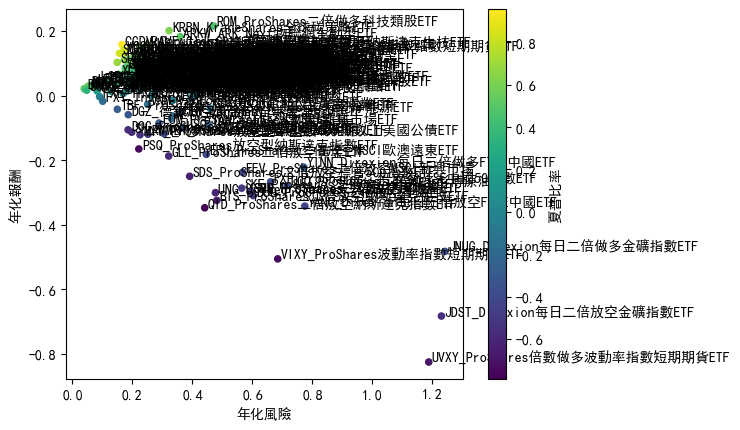

In [1]:
"""
全世界ETF比較
1. 取得全世界ETF
2. 計算報酬、風險
3. 繪製在點圖上 X軸為風險 Y軸為報酬
"""

# 載入函數工具檔
from Data import getDataYF, getMultipleReturn
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False


# 取出全世界ETF
url = "https://fund.megabank.com.tw/ETFData/djjson/et020001jsonMega.djjson?FD=E&b=1&a=null&P1=mega&P2=&P3=true&P4=false&P5=false"
response = requests.get(url)
dfs = json.loads(response.text)["ResultSet"]["Result"]
prods = pd.DataFrame(dfs)
usd_prods = prods[prods["V3"] == "美元"]["V1"].to_list()

# 抓到所有歷史報酬率
ret_dataframe = getMultipleReturn(getDataYF, usd_prods, "adj close")

# 計算年化報酬率 年化標準差
rs = []
for col in ret_dataframe.columns:
    symbol_name = prods.loc[prods["V1"] == col, "V2"].iloc[0]
    returns = ret_dataframe[col]
    ann_ret = (returns).prod() ** (252 / returns.count()) - 1
    ann_risk = (returns - 1).std() * (252 ** 0.5)
    ann_sharp = ann_ret / ann_risk
    rs.append([f"{col}_{symbol_name}", ann_ret, ann_risk, ann_sharp])
    print(col)
# 每檔商品的風險報酬
rsdf = pd.DataFrame(rs)
rsdf.columns = ["名稱", "年化報酬", "年化風險", "夏普比率"]
rsdf.set_index("名稱", inplace=True)

ax = rsdf.plot.scatter(x="年化風險", y="年化報酬", c="夏普比率", colormap="viridis")

for i, txt in enumerate(rsdf.transpose()):
    ax.annotate(txt, (rsdf["年化風險"].iat[i] + 0.01, rsdf["年化報酬"].iat[i]))
